# Week 4 - Data Science in the Real World

## <font color='#1A9FFF'>Workshop Outline</font>
<ul>
    <li>How to structure an end-to-end predictive modeling project?</li>
    <li>Step-by-step case study: diabetes prediction</li>
    <li>10 minute break</li>
</ul>

<ul>
    <li>Mini project</li>
</ul>

## <font color='#1A9FFF'>How to structure an end-to-end predictive modeling project?</font>
Applied machine learning is an empirical skill. You cannot get better at it by reading books and articles. You have to practice. In this session you will discover the generic six-step machine learning project template that you can use to jump-start your predictive modeling project.

**1. Problem preparation** 
* 1.1 Load libraries
* 1.2 Load dataset

**2. Exploratory data analysis** 
* 2.1 Understand the data with descriptive statistics
* 2.2 Understand the data with plotting

**3. Data preparation** 
* 3.1 Data cleaning
* 3.2 Data transforms
* 3.3 Feature selection

**4. Model evaluation** 
* 4.1 Train-test split
* 4.2 Train model
* 4.3 Test evaluation metric

**5. Model tuning**
* 5.1 Hyperparamter tuning

**6. Model understanding**
* 6.1 Feature importance
* 6.2 Paritial dependence plot



## <font color='#1A9FFF'>Case study: diabetes prediction</font>
Working through machine learning problems from end-to-end is critically important. You can read about machine learning. You can also try out small one-off recipes. But applied machine learning will not come alive for you until you work through a dataset from beginning to end.

Working through a project forces you to think about how the model will be used, to challenge your assumptions and to get good at all parts of a project, not just your favorite parts. The best way to practice predictive modeling machine learning projects is to use standardized datasets from the UCI Machine Learning Repository. Once you have a practice dataset and a bunch of recipes, how do you put it all together and work through the problem end-to-end?

**The Data**

The diabetes data set was originated from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes). This dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within five years. 

**Data Dictionary**
* Pregnancies: Number of times pregnant 
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
* BloodPressure: Diastolic blood pressure (mm Hg) 
* SkinThickness: Triceps skin fold thickness (mm) 
* Insulin: 2-Hour serum insulin (mu U/ml) 
* BMI: Body mass index (weight in kg/(height in m)^2) 
* DiabetesPedigreeFunction: Diabetes pedigree function 
* Age: Age (years) 
* Outcome: Class variable (0 or 1) 

**The project is to:**

Perform binary classification to predict the diabetes outcome. 

## 1. Problem preparation

### Data Structure 
After reading in the data, we first do some simple exploration, check available columns, data structure, and data summary.

### 1.1 Load libraries

In [2]:
import numpy  as np                                    # import numpy for number handling
import pandas as pd                                    # import pandas for data wrangling
import matplotlib.pyplot as plt                        # import matplotlib for ploting
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier    # import randomForest package for predictive modeling
from sklearn import metrics                            # import matrics package from sklearn to evaluate the models

### 1.2 Load dataset

In [3]:
data = pd.read_csv('datasets/diabetes.csv')

## 2. Exploratory data analysis

### 2.1 Understand the data With descriptive statistics

**Peek at your data**

In [4]:
data.head(5) # take a look at the first 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.tail(5) # take a look at the last 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**Structure of your data**

In [6]:
data.info() # data structure

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


**Descriptive Statistics**

In [7]:
data.describe() # data summary

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Class Distribution**

In [11]:
g_class = data.groupby('Outcome')  # group by Outcome
s_class = g_class.size()           # check the number of samples in each class

print s_class

Outcome
0    500
1    268
dtype: int64


You can see that there are nearly double the number of observations with class 0 (no onset of diabetes) than there are with class 1 (onset of diabetes).

**Correlations Between Attributes**

In [12]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### 2.2 Understand the data with plotting

**Univariate Plots - Histograms**

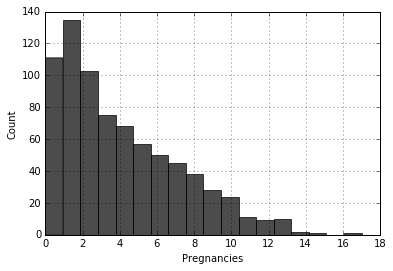

In [21]:
# Plot histogram of column Pregnancies
ax = data['Pregnancies'].hist(color='k', alpha=0.7, bins=18) # draw histogram

ax.set_xlabel("Pregnancies")  # set title for x axis
ax.set_ylabel("Count")        # set title for y axis

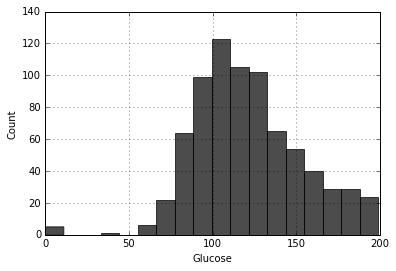

In [22]:
# Plot histogram of column Glucose
ax = data['Glucose'].hist(color='k', alpha=0.7, bins=18) # draw histogram

ax.set_xlabel("Glucose")  # set title for x axis
ax.set_ylabel("Count")    # set title for y axis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d32d290>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10beba890>]], dtype=object)

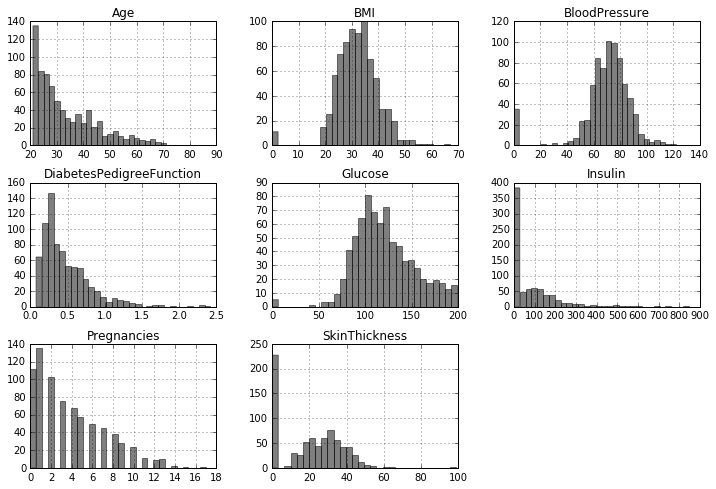

In [28]:
# Plot histogram of every column 
data_wo_outcome = data.iloc[:, 0:8]                                    # pick out columns without outcome

data_wo_outcome.hist(color='k', alpha=0.5, bins=30, figsize=(12, 8))   # draw histogram for each selected attribute

**Univariate Plots - Boxplot**

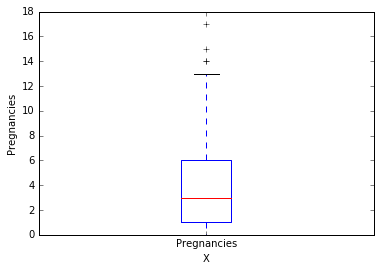

In [37]:
# Plot boxplot of column Pregnancies
ax = data['Pregnancies'].plot(kind = 'box')  # draw boxplot

ax.set_xlabel("X")              # set title for x axis
ax.set_ylabel("Pregnancies")    # set title for y axis

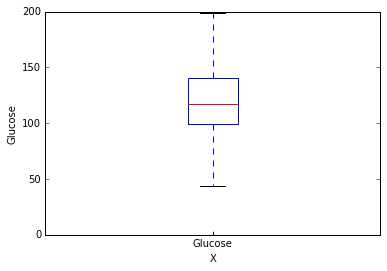

In [38]:
# Plot boxplot of column Glucose
ax = data['Glucose'].plot(kind = 'box')  # draw boxplot

ax.set_xlabel("X")              # set title for x axis
ax.set_ylabel("Glucose")        # set title for y axis

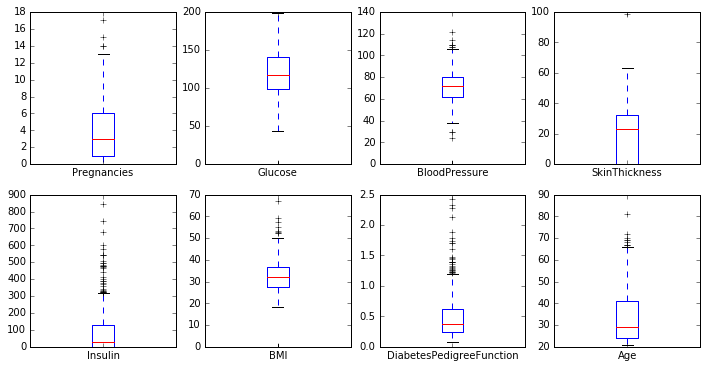

In [43]:
# Plot boxplot of every column 
data_wo_outcome = data.iloc[:, 0:8]                                    # pick out columns without outcome

data_wo_outcome.plot(kind='box', subplots=True, layout=(2, 4), figsize=(12, 6));

**Multivariate Plots - Scatter Plot Matrix**

A scatter plot shows the relationship between two variables as dots in two dimensions, one axis for each attribute. You can create a scatter plot for each pair of attributes in your data. Drawing all these scatter plots together is called a scatter plot matrix. Scatter plots are useful for spotting structured relationships between variables, like whether you could summarize the relationship between two variables with a line. Attributes with structured relationships may also be correlated and good candidates for removal from your dataset.

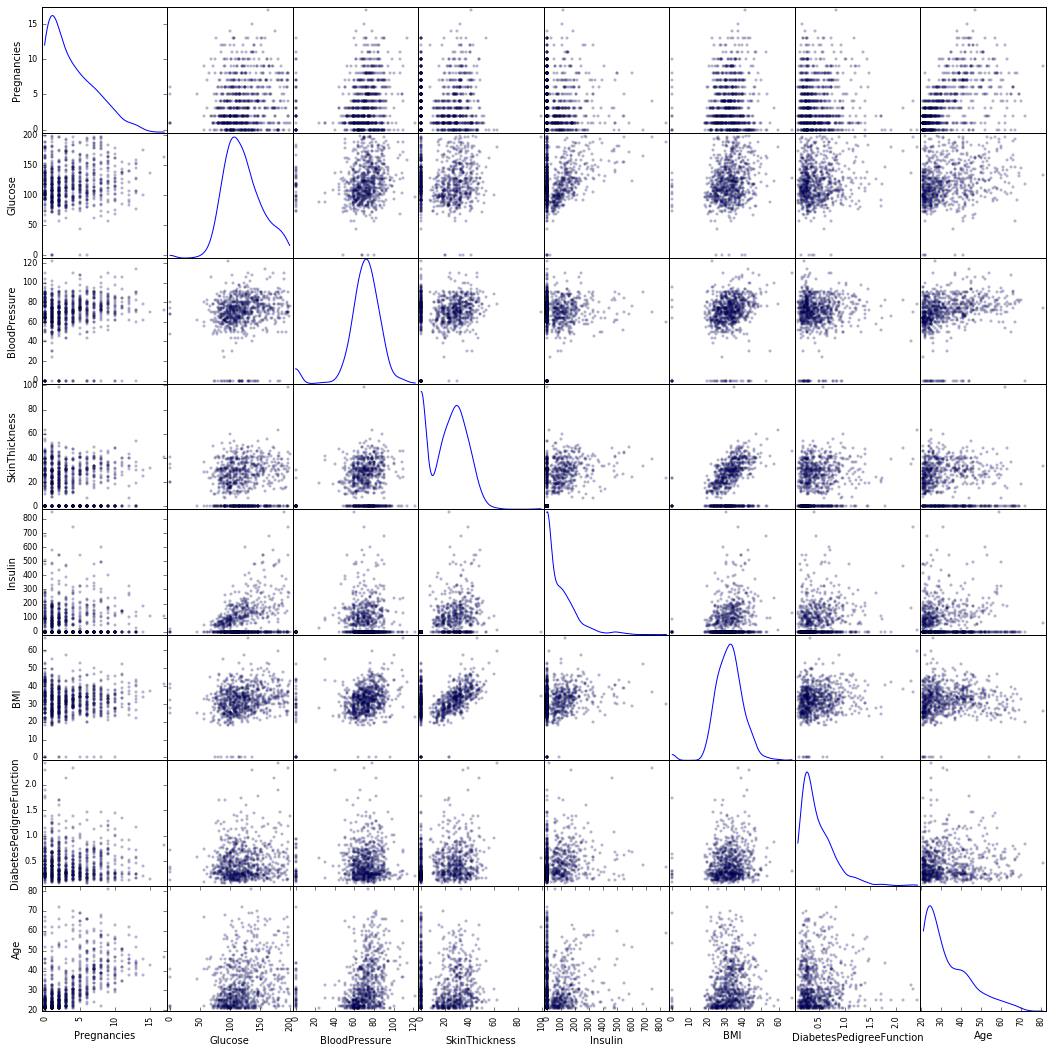

In [49]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(data_wo_outcome, alpha=0.2, figsize=(18, 18), diagonal='kde');

## 3. Data preparation

### 3.1 Data cleaning
Never assume the data is clean. If anything strange gets observed during exploratory data analysis in step 2, clarify with the data owner immediately. 

### 3.2 Data transforms
Many machine learning algorithms make assumptions about your data. It is often a very good idea to prepare your data in such a way to best expose the structure of the problem to the machine learning algorithms that you intend to use.

The good news about decision tree and random forest algorithm is that they are robust to outliers and do not make specific assumption about feature distribution. Therefore, data preprocessing such as scaling or normalization is not needed.

### 3.3 Feature selection
Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested. In step 6.1, We'll explore how to perform feature selection by feature importance analysis. 

## 4. Model evaluation

### 4.1 Train-test split

The simplest method that we can use to evaluate the performance of a machine learning algorithm is to use different training and testing datasets. We can take our original dataset and split it into two parts. Train the algorithm on the first part, make predictions on the second part and evaluate the predictions against the expected results. The size of the split can depend on the size and specifics of your dataset, although it is common to use 67% of the data for training and the remaining 33% for testing.

In [130]:
import numpy as np

# Split the dataset (X and Y) into training and testing sets
from sklearn.cross_validation import train_test_split

X = data.loc[:, ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = data.loc[:, ['Outcome']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### 4.2 Train model

Comparing to decision trees, random forest algorithm effectively reduces the risk of overfitting.

In [131]:
# Train a random forest on the training data
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=1) 
forest_clf = forest_clf.fit(X_train, Y_train)

/Users/Calcifer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


### 4.3 Test evaluation metric

Classification accuracy is the number of correct predictions made as a ratio of all predictions made.

In [132]:
# Predict the class labels of the training and testing data
Y_pred_train = forest_clf.predict(X_train)
Y_pred_test  = forest_clf.predict(X_test)

# Compute the classification accuracy
from sklearn import metrics

acc_train = metrics.accuracy_score(Y_train, Y_pred_train)
acc_test  = metrics.accuracy_score(Y_test,  Y_pred_test)

print "The training accuracy is: ", round(acc_train*100,2), '%'
print "The testing accuracy is:  ", round(acc_test*100, 2), '%'

The training accuracy is:  97.86 %
The testing accuracy is:   76.38 %


In [133]:
# Area Under Curve (AUC)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred_test)
auc = metrics.auc(fpr, tpr)

print auc

0.723228663446


## 5. Model tuning

In general, Random Forest requires less hyperparameter tuning comparing to other machine learning algorithms such as neural networks and gradient boosting machines. 

In below, we tune `nodesize`, which sets the minimum size of leaf nodes. Setting this number larger causes smaller trees to be grown.

In [134]:
# re-train the model
forest_clf = RandomForestClassifier(max_depth=8, n_estimators=100, random_state=1) 
forest_clf = forest_clf.fit(X_train, Y_train)

/Users/Calcifer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


In [135]:
# Accuracy
Y_pred_train = forest_clf.predict(X_train)
Y_pred_test  = forest_clf.predict(X_test)

# Compute the classification accuracy
from sklearn import metrics

acc_train = metrics.accuracy_score(Y_train, Y_pred_train)
acc_test  = metrics.accuracy_score(Y_test,  Y_pred_test)

print "The training accuracy is: ", round(acc_train*100,2), '%'
print "The testing accuracy is:  ", round(acc_test*100, 2), '%'

The training accuracy is:  96.69 %
The testing accuracy is:   79.13 %


In [136]:
# Area Under Curve (AUC)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred_test)
auc = metrics.auc(fpr, tpr)

print auc

0.740136876006


## 6. Model understanding

### 6.1 Feature importance

In [137]:
# Feature names
f_names = ['Preg.', 'Gluc.', 'BPre.', 'SkTh.', 'Insu.', 'BMI  ', 'DiPe.', 'Age  ']

# Compute and print the feature ranking
imp_feat_rf = forest_clf.feature_importances_
indices = np.argsort(imp_feat_rf)[::-1] # sort the features according to their importance

print("Feature ranking:\n")

for f in range (X_train.shape[1]):
    print("%d. %s   (%f)" % (f+1, f_names[indices[f]], imp_feat_rf[indices[f]]))

Feature ranking:

1. Gluc.   (0.261147)
2. BMI     (0.186823)
3. Age     (0.126693)
4. DiPe.   (0.121469)
5. BPre.   (0.084409)
6. Insu.   (0.079488)
7. SkTh.   (0.070341)
8. Preg.   (0.069630)


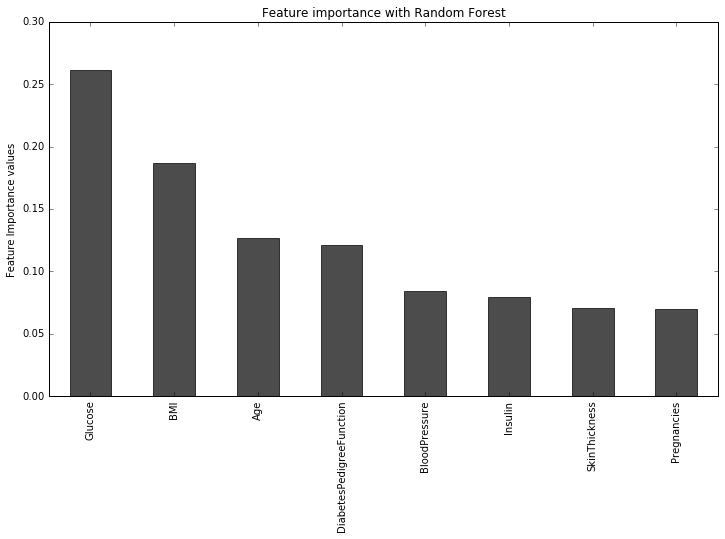

In [140]:
# Plot the features
ind = X_train.columns

imp_feat_rf = pd.Series(imp_feat_rf,ind).sort_values(ascending=False)
imp_feat_rf[:].plot(kind='bar', title='Feature importance with Random Forest', color = 'k', alpha=0.7, figsize=(12,8))

plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)
plt.show()

### 6.2 Partital dependence plot

/Users/Calcifer/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


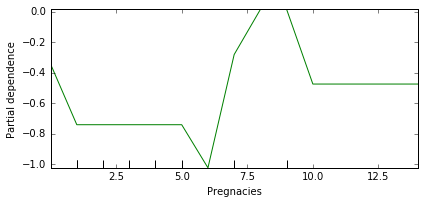

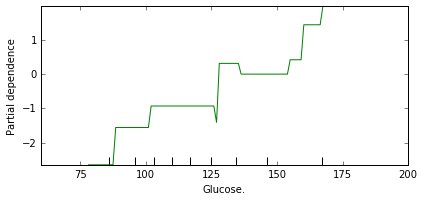

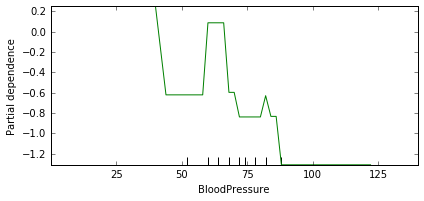

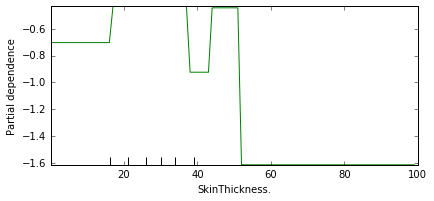

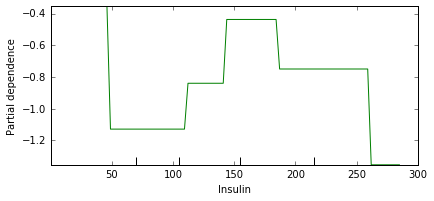

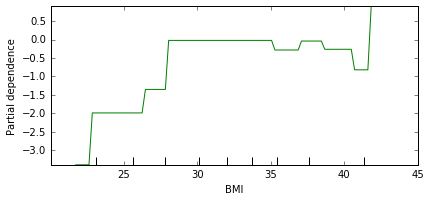

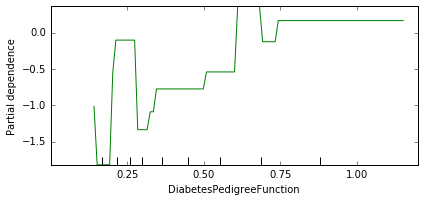

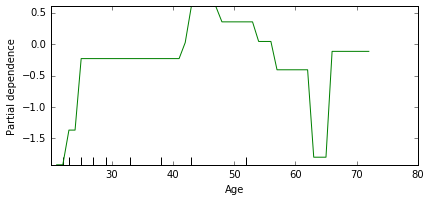

In [153]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import plot_partial_dependence

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, Y_train)
f_importance = clf.feature_importances_  

f_names = ['Pregnacies', 'Glucose.', 'BloodPressure', 'SkinThickness.', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i in range(X_train.shape[1]):
    fig, axs = plot_partial_dependence(clf, X_train, [i], feature_names=f_names)

## <font color='#1A9FFF'>Mini project</font>

## <font color='#1A9FFF'>Mini project 1</font>

## <font color='#1A9FFF'>Mini project 2</font>

## <font color='#1A9FFF'>Mini project 3</font>